In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# save LRG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz', ra_LRG=ra_LRG)
# print(ra_LRG.shape)
data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz', dec_LRG=dec_LRG)
# print(dec_LRG.shape)
data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz', z_LRG=z_LRG)
# print(z_LRG.shape)
data_zLRG = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz', gmag_LRG=gmag_LRG)
# print(gmag_LRG.shape)
data_gmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz', rmag_LRG=rmag_LRG)
# print(rmag_LRG.shape)
data_rmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz', zmag_LRG=zmag_LRG)
# print(zmag_LRG.shape)
data_zmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz', grcolor_LRG=grcolor_LRG)
# print(grcolor_LRG.shape)
data_grcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz', rzcolor_LRG=rzcolor_LRG)
# print(rzcolor_LRG.shape)
data_rzcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)


In [3]:
# save BKG data arrays

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz', ra_BKG=ra_BKG)
# print(ra_BKG.shape)
data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz', dec_BKG=dec_BKG)
# print(dec_BKG.shape)
data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz', gmag_BKG=gmag_BKG)
# print(gmag_BKG.shape)
data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz', rmag_BKG=rmag_BKG)
# print(rmag_BKG.shape)
data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz', zmag_BKG=zmag_BKG)
# print(zmag_BKG.shape)
data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz', grcolor_BKG=grcolor_BKG)
# print(grcolor_BKG.shape)
data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz', rzcolor_BKG=rzcolor_BKG)
# print(rzcolor_BKG.shape)
data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)


(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)
----
(517525,)


In [4]:
# save combined LRG and BKG lists

# np.savez('/Users/mtownsend/Documents/LRG_Data/ra_total.npz', ra=ra)
# print(ra.shape)
data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
ra_total = data_ra['ra']
print(ra_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/dec_total.npz', dec=dec)
# print(dec.shape)
data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
dec_total = data_dec['dec']
print(dec_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz', gmag=gmag)
# print(gmag.shape)
data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
gmag_total = data_gmag['gmag']
print(gmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz', rmag=rmag)
# print(rmag.shape)
data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
rmag_total = data_rmag['rmag']
print(rmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz', zmag=zmag)
# print(zmag.shape)
data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
zmag_total = data_zmag['zmag']
print(zmag_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz', grcolor=grcolor)
# print(grcolor.shape)
data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
grcolor_total = data_grcolor['grcolor']
print(grcolor_total.shape)

print('----')

# np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz', rzcolor=rzcolor)
# print(rzcolor.shape)
data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
rzcolor_total = data_rzcolor['rzcolor']
print(rzcolor_total.shape)

print(rzcolor_total[0:10])
print(rzcolor_total[0])
print(rzcolor_total[5])

(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
----
(519348,)
[0.75320435 1.3548889  1.1859646  0.8234596  0.9435139  1.1689548
 0.8595371  0.9884472  1.2700977  1.3163471 ]
0.75320435
1.1689548


In [6]:

data_index_lowz = np.load('/Users/mtownsend/Documents/LRG_Data/index_lowz.npz')
index_lowz = data_index_lowz['index_lowz']
print(index_lowz)


data_index_midz = np.load('/Users/mtownsend/Documents/LRG_Data/index_midz.npz')
index_midz = data_index_midz['index_midz']
print(index_midz)


data_index_high = np.load('/Users/mtownsend/Documents/LRG_Data/index_highz.npz')
index_high = data_index_high['index_high']
print(index_high)


[285350 425505 279833 ...  65350  68200  30977]
[207051 397706 339031 ...   2426 394878 345638]
[424177 516268 237656 ... 149718 201518 449165]


In [9]:
# make a random data set that I will treat as LRGs
random_raLRG = ra_total[index_lowz]
random_decLRG = dec_total[index_lowz]
random_gmagLRG = gmag_total[index_lowz]
random_rmagLRG = rmag_total[index_lowz]
random_zmagLRG = zmag_total[index_lowz]
random_grcolorLRG = grcolor_total[index_lowz]
random_rzcolorLRG = rzcolor_total[index_lowz]

# eliminate "LRGs" from background catalog
random_raBKG = np.delete(ra_total, index_lowz)
random_decBKG = np.delete(dec_total, index_lowz)
random_gmagBKG = np.delete(gmag_total, index_lowz)
random_rmagBKG = np.delete(rmag_total, index_lowz)
random_zmagBKG = np.delete(zmag_total, index_lowz)
random_grcolorBKG = np.delete(grcolor_total, index_lowz)
random_rzcolorBKG = np.delete(rzcolor_total, index_lowz)

print(len(random_raLRG))
print(len(random_raBKG))
print(len(ra_total))
print(len(random_raLRG) + len(random_raBKG))

ra_tot = np.concatenate([random_raLRG, random_raBKG])
dec_tot = np.concatenate([random_decLRG, random_decBKG])
gmag_tot = np.concatenate([random_gmagLRG, random_gmagBKG])
rmag_tot = np.concatenate([random_rmagLRG, random_rmagBKG])
zmag_tot = np.concatenate([random_zmagLRG, random_zmagBKG])
rzcolor_tot = np.concatenate([random_rzcolorLRG, random_rzcolorBKG])
grcolor_tot = np.concatenate([random_grcolorLRG, random_grcolorBKG])

print(len(ra_tot))
print(len(dec_tot))
print(len(gmag_tot))
print(len(rmag_tot))
print(len(zmag_tot))
print(len(rzcolor_tot))
print(len(rzcolor_tot))


5000
514348
519348
519348
519348
519348
519348
519348
519348
519348
519348


In [10]:
# assign random LRGs to a redshift bin

data_random_z_low = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_low.npz')
random_z_low = data_random_z_low['random_z_low']
print(len(random_z_low))
print(random_z_low[0:30])


data_random_z_mid = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_mid.npz')
random_z_mid = data_random_z_mid['random_z_mid']
print(len(random_z_mid))
print(random_z_mid[0:30])


data_random_z_high = np.load('/Users/mtownsend/Documents/LRG_Data/random_z_high.npz')
random_z_high = data_random_z_high['random_z_high']
print(len(random_z_high))
print(random_z_high[0:30])


5000
[0.32648176 0.30706513 0.22249597 0.27757987 0.33435538 0.26870245
 0.24457863 0.23147915 0.31191498 0.34621966 0.33113268 0.24363983
 0.3133162  0.25518435 0.34101537 0.29946494 0.3031244  0.32212478
 0.24067542 0.22741453 0.3169481  0.22705966 0.28595838 0.294158
 0.31616357 0.2349633  0.32212478 0.3134778  0.21866548 0.3404493 ]
5000
[0.38804546 0.47532997 0.48086032 0.4580439  0.4180531  0.2737642
 0.48276645 0.20634842 0.43478048 0.46654576 0.36383975 0.42088297
 0.28590602 0.42528126 0.4700741  0.47368458 0.22249597 0.44786978
 0.32883874 0.46518913 0.49678138 0.20216194 0.23979786 0.2783213
 0.21831068 0.22961892 0.2780781  0.37807903 0.43663886 0.28225613]
5000
[0.53010046 0.5732451  0.5585143  0.52618074 0.56853735 0.593981
 0.6246413  0.61173654 0.5124754  0.25246546 0.32071343 0.5890506
 0.51874465 0.34487122 0.5037511  0.3107666  0.5240857  0.58167243
 0.42666408 0.41905198 0.3107666  0.48988923 0.477371   0.5137853
 0.6129099  0.56289154 0.5016405  0.4957808  0.420172

In [11]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(random_z_low)

print("end cosmoCalc")

end cosmoCalc


In [12]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))


H1, nouse_edges = np.histogramdd((rzcolor_tot, grcolor_tot, zmag_tot), bins=(rz_edges, gr_edges, zmag_edges), density=False)


<class 'numpy.ndarray'>


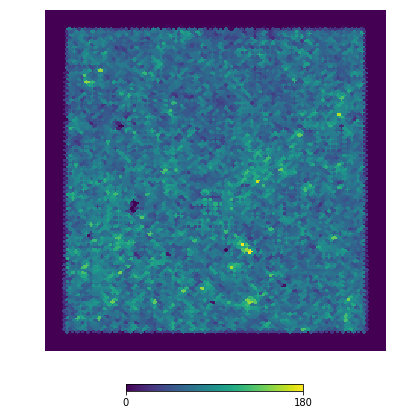

length phi:  519348


In [13]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_tot)):
    theta.append(np.radians(90. - dec_tot[i]))
    phi.append(np.radians(ra_tot[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)


In [61]:
def nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, mag_LRG, mag_BKG, color1_LRG, color1_BKG, color2_LRG, color2_BKG, edges):
# def nearNeighbor(distance, kpc_DA, ra_LRG, dec_LRG, ra_BKG, dec_BKG, mag, color, xedges, yedges):

    # distance == radius from LRG in which I look for near neighbors in Mpc

    import numpy as np
    from sklearn.neighbors import KDTree

    distance_kpc = distance * 10**3. # in kpc

    dist = []
    for i in range(len(kpc_DA)):
        dist.append((distance_kpc / kpc_DA[i]) * 1. / 3600.) # in degree

     # Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
    zip_list0 = list(zip(ra_LRG, dec_LRG))  # LRG sources
    ra = np.concatenate([ra_LRG, ra_BKG])
    dec = np.concatenate([dec_LRG, dec_BKG])
    zip_list1 = list(zip(ra, dec))  # All sources
    print(len(dec))
    print(len(dec_LRG))
    print(len(dec_BKG))


    # Creates a tree of EDR sources
    gal_tree = KDTree(zip_list1)

    # returns a list of EDR sources that are within some radius r of an LRG
    nn1 = gal_tree.query_radius(zip_list0, r=dist, count_only=True)
    # nn2 = gal_tree.query_radius(zip_list0, r=dist2, count_only=True)
#     print("nn1 = ", nn1)


    # find indices of near neighbors
    ind = gal_tree.query_radius(zip_list0, r=dist)
#     print('index = ', ind)

    ind2list = []
    ind2list = ind.tolist()

    index = []
    for i in range(len(ind2list)):
        index.append(ind2list[i].tolist())

    # # Array that gives actual number of near neighbors for every LRG
    # num = []
    #
    # for i in range(len(ind)):
    #     num.append(len(ind[i]))

    # index1 = []
    for i in range(len(index)):
        index[i] = [x for x in index[i] if x != i]
        
#     print(index)

    # Array that gives actual number of near neighbors for every LRG
    num = []

    for i in range(len(index)):
        num.append(len(index[i]))

    near = []
    mag = np.concatenate([mag_LRG, mag_BKG])
    color1 = np.concatenate([color1_LRG, color1_BKG])
    color2 = np.concatenate([color2_LRG, color2_BKG])

    # Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
    for i in range(len(index)):
        if len(index[i]) == 0:
            hist3d = np.zeros((len(edges[0]) - 1, len(edges[1]) - 1, len(edges[2] - 1)))
            # hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
            near.append(hist3d)
        else:

            # hist2d, x_notuse, y_notuse = np.histogram2d(mag[index1[i]], color[index1[i]], bins=(xedges, yedges), normed=False)
            # hist3d, edges_nouse = np.histogramdd((color1[index[i]], mag[index[i]], color2[index[i]]), bins=(edges[0], edges[1], edges[2]),
            #                                             density=False)
            hist3d, edges_nouse = np.histogramdd((color1[index[i]], color2[index[i]], mag[index[i]]), bins=(edges[0], edges[1], edges[2]), density=False)
            near.append(hist3d)

    return (distance_kpc, near, gal_tree, dist, index, nn1, ind)
    # return (near, gal_tree)
    
    

In [48]:
ra_LRG = random_raLRG[0:20]
dec_LRG = random_decLRG[0:20]
kpc = kpc_DA[0:20]
zmag_LRG = random_zmagLRG[0:20]
grcolor_LRG = random_grcolorLRG[0:20]
rzcolor_LRG = random_rzcolorLRG[0:20]
z_LRG = random_z_low[0:20]

print(len(ra_LRG))

20


In [64]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1, ind = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, random_raBKG, random_decBKG, random_zmagLRG, random_zmagBKG, random_rzcolorLRG, random_rzcolorBKG, random_grcolorLRG, random_grcolorBKG, nouse_edges)
# distance_kpc, near, gal_tree, dist, index, nn1, ind = nearNeighbor(distance, kpc_DA, random_raLRG, random_decLRG, raBKG, decBKG, random_zmagLRG, zmagBKG, random_rzcolorLRG, rzcolorBKG, random_grcolorLRG, grcolorBKG, nouse_edges)
# distance_kpc, near, gal_tree, dist, index, nn1, ind = nearNeighbor(distance, kpc, ra_LRG, dec_LRG, raBKG, decBKG, zmag_LRG, zmagBKG, rzcolor_LRG, rzcolorBKG, grcolor_LRG, grcolorBKG, nouse_edges)

print('end nearNeighbor')

519348
5000
514348
end nearNeighbor


In [65]:
print(len(index))
print(len(index[0]))

index_arr = np.asarray(index)
low_nearindex35 = index_arr[np.where((z_LRG >= 0.2) & (z_LRG < 0.35))]
print(type(low_nearindex35))

for i in range(len(low_nearindex35)):
    print(i)
    temp = np.asarray(low_nearindex35[i])
    print(temp.max())

5000
81
<class 'numpy.ndarray'>
0
293717
1
426574
2
282410
3
26065
4
373796
5
135773
6
459951
7
414008
8
477432
9
256974
10
252848
11
142338
12
476996
13
103813
14
277798
15
517467
16
356956
17
364836
18
140151
19
136690
